In [126]:
import pandas as pd

from plotnine import *
import seaborn as sns

# model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor


In [125]:
df = pd.read_csv("data/train_sample.csv")

ParserError: Error tokenizing data. C error: out of memory

In [ ]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-05-13 10:15:00.00000099,10.90,2011-05-13 10:15:00 UTC,-73.972253,40.746463,-73.955485,40.764362,5
1,2014-06-25 22:25:00.00000061,37.50,2014-06-25 22:25:00 UTC,-74.008180,40.707032,-73.928460,40.853647,1
2,2012-07-07 18:20:23.0000001,5.70,2012-07-07 18:20:23 UTC,-73.994439,40.734462,-74.007644,40.740937,1
3,2013-09-25 21:57:00.00000071,6.50,2013-09-25 21:57:00 UTC,-73.996230,40.753520,-73.987592,40.770522,1
4,2009-10-11 22:44:25.0000004,5.30,2009-10-11 22:44:25 UTC,-73.989362,40.726397,-73.997931,40.719469,1
...,...,...,...,...,...,...,...,...
559995,2010-03-22 09:35:02.0000002,5.70,2010-03-22 09:35:02 UTC,-73.982407,40.774540,-73.981533,40.759639,1
559996,2013-05-07 00:01:50.0000003,33.83,2013-05-07 00:01:50 UTC,-73.863798,40.769201,-73.970943,40.798694,1
559997,2010-12-16 20:04:00.000000179,4.10,2010-12-16 20:04:00 UTC,-74.008525,40.734195,-74.003213,40.735595,2
559998,2014-11-18 23:06:00.000000164,37.00,2014-11-18 23:06:00 UTC,-73.953675,40.763757,-73.935610,40.671752,3


In [ ]:
# est va en clean
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df["pickup_datetime"] = df['pickup_datetime'].apply(lambda x: x.weekofyear)
df

C:\Users\vocho\AppData\Local\Temp\ipykernel_15660\3804150831.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-05-13 10:15:00.00000099,10.90,19,-73.972253,40.746463,-73.955485,40.764362,5
1,2014-06-25 22:25:00.00000061,37.50,26,-74.008180,40.707032,-73.928460,40.853647,1
2,2012-07-07 18:20:23.0000001,5.70,27,-73.994439,40.734462,-74.007644,40.740937,1
3,2013-09-25 21:57:00.00000071,6.50,39,-73.996230,40.753520,-73.987592,40.770522,1
4,2009-10-11 22:44:25.0000004,5.30,41,-73.989362,40.726397,-73.997931,40.719469,1
...,...,...,...,...,...,...,...,...
559995,2010-03-22 09:35:02.0000002,5.70,12,-73.982407,40.774540,-73.981533,40.759639,1
559996,2013-05-07 00:01:50.0000003,33.83,19,-73.863798,40.769201,-73.970943,40.798694,1
559997,2010-12-16 20:04:00.000000179,4.10,50,-74.008525,40.734195,-74.003213,40.735595,2
559998,2014-11-18 23:06:00.000000164,37.00,47,-73.953675,40.763757,-73.935610,40.671752,3


In [ ]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
# NAs per column
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    6
dropoff_latitude     6
passenger_count      0
dtype: int64

In [ ]:
# Al ser solo 6 NA no representa un riesgo eliminar
# Drop NAs
data = df.dropna().copy()
data.isnull().values.any()

False

In [ ]:
data.shape

(559994, 8)

# EDA

In [ ]:
data.describe()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,559994.000000,559994.000000,559994.000000,559994.000000,559994.000000,559994.000000,559994.000000
mean,11.329752,25.509291,-72.473037,39.887887,-72.495470,39.909631,1.684947
std,9.772437,14.923346,14.440643,11.290346,13.690870,10.344144,1.337856
min,-49.570000,1.000000,-2959.462187,-3430.761308,-3328.756240,-3430.761308,0.000000
25%,6.000000,13.000000,-73.992012,40.734852,-73.991385,40.734038,1.000000
50%,8.500000,24.000000,-73.981787,40.752572,-73.980137,40.753143,1.000000
75%,12.500000,39.000000,-73.967049,40.767130,-73.963590,40.768120,2.000000
max,500.000000,53.000000,3445.027905,2371.279908,3061.872988,3306.705933,208.000000


In [ ]:
data.describe(include=[object])

,key
count,559994
unique,559994
top,2011-05-13 10:15:00.00000099
freq,1


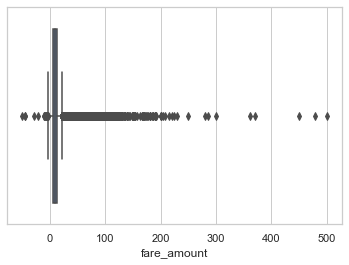

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["fare_amount"])

Lo que primero llama la atención es que en tarifa tenermos valores negativos, son descuentos?

In [ ]:
data

# Model

In [122]:
X = data.drop(['fare_amount', 'key'], axis=1)
y = data.fare_amount

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=.3,random_state=100)


MemoryError: Unable to allocate 8.54 MiB for an array with shape (2, 559994) and data type int64

In [ ]:
X_train

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
259793,14,-73.981905,40.772783,-73.964283,40.765617,1
501144,17,-73.983049,40.752177,-73.945683,40.707864,1
505924,19,-73.974005,40.747727,-73.994562,40.697913,2
453427,25,-73.977572,40.774005,-73.981142,40.779435,1
329023,28,-74.005753,40.742265,-73.997608,40.746287,2
...,...,...,...,...,...,...
344418,1,-73.992311,40.728975,-73.991825,40.749128,1
212916,9,-73.988570,40.743077,-73.979005,40.734640,2
65616,50,-73.967815,40.800932,-73.960325,40.809897,5
210759,32,-73.989192,40.739000,-73.977268,40.745412,1


In [ ]:
# Para el escalado de las variables numericas usaremos MinMaxScaler
# y como lo mensionamos anterirormente usaremos el promedio para la imputación
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

# handle_unknown='ignore' es importante en caso de tomar una categoria que no se encontraba 
# durante el proceso de entrenamiento
categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# diferenciamos varibles numericas y las que no los son
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

In [ ]:
LinearRegression = LinearRegression()

linearRegression_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', LinearRegression)
])

In [ ]:
_ = linearRegression_pipeline.fit(X_train, y_train)

In [ ]:
y_pred = linearRegression_pipeline.predict(X_valid)

In [ ]:
mean_squared_error(y_valid, y_pred)

94.05429194789656

In [ ]:
RandomForestRegressor = RandomForestRegressor()

randomforestRegression_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', RandomForestRegressor)
])

randomforestRegression_pipeline.fit(X_train, y_train)
y_pred = randomforestRegression_pipeline.predict(X_valid)
mean_squared_error(y_valid, y_pred)

TypeError: 'RandomForestRegressor' object is not callable

# TEST

In [ ]:
# Cargamos los datos
test_data = pd.read_csv('data/test.csv')
test_data

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
# Limpiamos
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])
test_data["pickup_datetime"] = test_data['pickup_datetime'].apply(lambda x: x.weekofyear)

# No necesitamos para la clasificación la columna ID
key = test_data.pop('key')
test_data.head()

C:\Users\vocho\AppData\Local\Temp\ipykernel_15660\2337811.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,5,-73.973320,40.763805,-73.981430,40.743835,1
1,5,-73.986862,40.719383,-73.998886,40.739201,1
2,40,-73.982524,40.751260,-73.979654,40.746139,1
3,48,-73.981160,40.767807,-73.990448,40.751635,1
4,48,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
fare_amount = linearRegression_pipeline.predict(test_data)

result = pd.DataFrame({'key':key, 'fare_amount':fare_amount})

In [ ]:
result.to_csv('result/test_data_fare_amount.csv', index=False)

result


,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.920750
1,2015-01-27 13:08:24.0000003,10.920645
2,2011-10-08 11:53:44.0000002,11.445879
3,2012-12-01 21:12:12.0000002,11.565873
4,2012-12-01 21:12:12.0000003,11.565948
...,...,...
9909,2015-05-10 12:37:51.0000002,11.748955
9910,2015-01-12 17:05:51.0000001,11.508953
9911,2015-04-19 20:44:15.0000001,11.704692
9912,2015-01-31 01:05:19.0000005,11.538844
